## Skripsie - Linear Regression
### Daniël S. van der Westhuizen
### 17158680

In [1]:
import numpy as np
import pylab as pl
from numpy.linalg import inv
import copy
from sklearn.preprocessing import normalize

## Bayesian Linear Regression

from Mackay's book

### Parameter Distribution

Here we define an 2D array over weight space, starting with the distribution shown in the figure below.

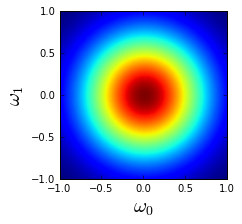

In [2]:
%matplotlib inline
pl.figure(figsize=(7,3))

#mathematics
data = np.random.rand(100,100)
for a in range(0,100):
    for b in range(0,100):
        x_loc = -1 + (b*0.02)
        y_loc = -1 + (a*0.02)
        probability = np.exp( -(( np.sqrt((x_loc)**2 + (y_loc)**2) )**2) / (2*(0.5**2)) )
        data[a][b] = probability

#figure
pl.gca().invert_yaxis()
pl.imshow(data, extent=[-1,1,-1,1])
pl.ylabel('$\omega_1$', fontsize=20)
pl.xlabel('$\omega_0$', fontsize=20)

In order to select random samples from a 2D probabilty distribution like this one, I wrote the heatmap_random function below.

In [3]:
def heatmap_random(data,n):
    
    w0 = np.zeros(n)
    w1 = np.zeros(n)
    
    for a in range(0,n):
        data_raveled = data.ravel()
        data_sum = np.sum(data_raveled)
        q = 0
        o = np.random.uniform(0,1) * data_sum
        e = 0
        i=1
        while e==0:
            q += data_raveled[i]
            if (q > o):
                e = i
                break
            i+=1
        w1[a] = -1 + (e/100 - (e%100)/100)*0.02
        w0[a] = -1 + (e%100)*0.02
    return w0, w1

Below is an evalution of $ y = \omega_0 + \omega_1 x $ for 6 random samples.

(-1, 1)

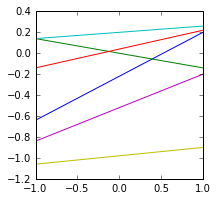

In [5]:
%matplotlib inline
pl.figure(figsize=(3,3))

#mathematics
w0, w1 = heatmap_random(data,6)

x_samples = []
y_samples = []

#figure
x_axis = np.linspace (-1,1,100)
for a in range(0,6):
    pl.plot(x_axis, w0[a] + w1[a]*x_axis)
pl.xlim(-1,1)
pl.xlim(-1,1)

A point on the x axis gets uniformly selected on the interval [-1,1]. And then $ y = -0.3 + 0.5x + Normal(0,0.2)$.

This technique will recover the values -0.3 and 0.5.

In [6]:
a0 = -0.3
a1 = 0.5
beta = 25
alpha = 2

s = 0.2

x_sample = np.random.uniform(-1,1)
x_samples.append(x_sample)
y_sample = a0 + (a1*x_sample) + np.random.normal(0,0.2)
y_samples.append(y_sample)

Using these particular random x and y values that were defined in the block above, we determine and plot the probability of y = -w0 + w1*x over w space. We then multiply this with the previous probability distribution over w space. We then again generate samples from the weight space using the heatmap_random function.

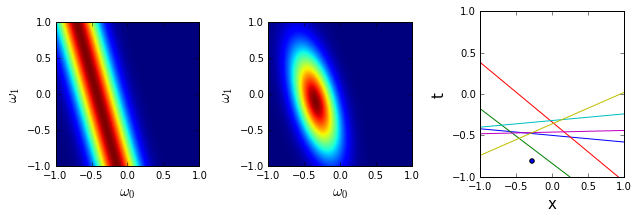

In [7]:
%matplotlib inline
pl.figure(figsize=(9,3))

current_sample_prob = np.random.rand(100,100)

for a in range(0,100):
    for b in range(0,100):
        w0 = -1 + (b*0.02)
        w1 = -1 + (a*0.02)
        y = w0 + (w1*x_sample)
        y_actual = a0 + (a1*x_sample)
        probability = np.exp(-(( (y-y_actual) -0)**2)/(2*(s**2)))
        current_sample_prob[a][b] = probability
        
data = data*current_sample_prob

w0, w1 = heatmap_random(data, 6)

pl.subplot(1, 3, 1)
pl.gca().invert_yaxis()
pl.imshow(current_sample_prob, extent=[-1,1,-1,1])
pl.ylabel('$\omega_1$', fontsize=15)
pl.xlabel('$\omega_0$', fontsize=15)

pl.subplot(1, 3, 2)
pl.gca().invert_yaxis()
pl.imshow(data, extent=[-1,1,-1,1])
pl.ylabel('$\omega_1$', fontsize=15)
pl.xlabel('$\omega_0$', fontsize=15)

pl.subplot(1, 3, 3)
x_axis = np.linspace (-1,1,100)
for a in range(0,6):
    pl.plot(x_axis, w0[a] + w1[a]*x_axis)
pl.xlim(-1,1)
pl.ylim(-1,1)
pl.scatter(x_samples,y_samples)
pl.tight_layout()
pl.ylabel('t', fontsize=15)
pl.xlabel('x', fontsize=15)

This process can the be repeated a many times as desired.Below are the results after 20 iterations.

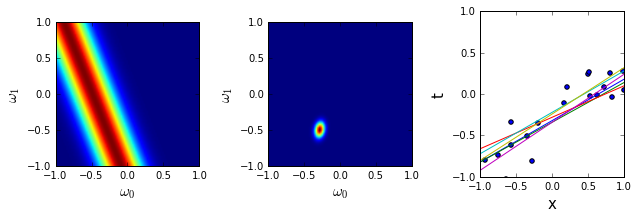

In [8]:
%matplotlib inline
pl.figure(figsize=(9,3))

for k in range(0,20-1):
    
    x_sample = np.random.uniform(-1,1)
    x_samples.append(x_sample)
    y_sample = a0 + (a1*x_sample) + np.random.normal(0,0.2)
    y_samples.append(y_sample)

    current_sample_prob = np.random.rand(100,100)

    for a in range(0,100):
        for b in range(0,100):
            w0 = -1 + (b*0.02)
            w1 = -1 + (a*0.02)
            y = w0 + (w1*x_sample)
            y_actual = a0 + (a1*x_sample)
            probability = np.exp(-(( (y-y_actual) -0)**2)/(2*(s**2)))
            current_sample_prob[a][b] = probability

    data = data*current_sample_prob
    
    
w0, w1 = heatmap_random(data, 6)

pl.subplot(1, 3, 1)
pl.gca().invert_yaxis()
pl.imshow(current_sample_prob, extent=[-1,1,-1,1])
pl.ylabel('$\omega_1$', fontsize=15)
pl.xlabel('$\omega_0$', fontsize=15)

pl.subplot(1, 3, 2)
pl.gca().invert_yaxis()
pl.imshow(data, extent=[-1,1,-1,1])
pl.ylabel('$\omega_1$', fontsize=15)
pl.xlabel('$\omega_0$', fontsize=15)

pl.subplot(1, 3, 3)
x_axis = np.linspace (-1,1,100)
for a in range(0,6):
    pl.plot(x_axis, w0[a] + w1[a]*x_axis)
pl.xlim(-1,1)
pl.ylim(-1,1)
pl.scatter(x_samples,y_samples)
pl.tight_layout()
pl.ylabel('t', fontsize=15)
pl.xlabel('x', fontsize=15)

This particular illustration is for the case of a one-dimensional input space and a single basis function $ \phi (x) = x $. This method is not limited to these constraints, but a higher dimensional input space will require an exponentionally larger amount of computer calculations.

### Predictive Distribution - One Dimension

Here we aim to replicate the example in chapter 3.3 in Bishop's book.
The input (x) of the training data in this demonstration is 25 evenly spaced points on the interval [0,1].
The output is the function shown below with a Gaussian noise of variance 0.2

(-0.01, 1.01)

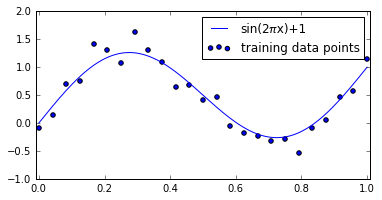

In [9]:
%matplotlib inline
pl.figure(figsize=(6,3))

#mathematics
N = 25
x = np.linspace(0,1,N)
#x = [ 0,0.45,0.55,1]
t = np.zeros(N)
for a in range(0,N):
    t[a] = np.sin(x[a]*2*np.pi) + np.random.normal(0,0.2) + x[a]
    
#figure
x_plot = np.linspace(0,1,10000)
pl.scatter(x,t,label="training data points")
pl.plot(x_plot,np.sin(x_plot*2*np.pi)+x_plot,label="sin(2πx)+1")
pl.legend(loc='upper right')
pl.xlim(-0.01,1.01)

The basis functions consists of Gaussian distributions with means evenly spaced over the interval [0,1] and each have variance of 0.2.

$$ \phi_j (x) = exp \left \{ - \frac{(x - \mu_j)^2)}{2s^2} \right \} \qquad (3.4) $$

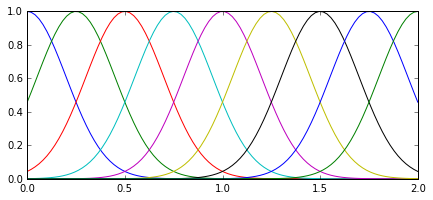

In [10]:
#set up each basis function as a column vector
#generate figure for demonstration
%matplotlib inline
pl.figure(figsize=(7,3))

#mathematics
s=0.2
mu = np.linspace(0,2,9)
phi_vector = ['0','0','0','0','0','0','0','0','0']
def phi(x,mu):
    phi = np.exp(-((x-mu)**2)/(2*(s**2)))
    return phi

#figure
x_plot = np.linspace(0,2,100)
for a in range(0,9):
    #print(phi(x,mu[a]))
    pl.plot(x_plot,phi(x_plot,mu[a]))
    phi_vector[a] = np.atleast_2d((phi(x_plot,mu[a]))).transpose()

For this demonstration the hyperparameters α and ß are arbitrarily chosen to be one and five. Beta was chosen based on randomly trying different values until one that works well was found.

In [11]:
alpha = 1
beta = 5

Now we evaluate the design matrix, $S_N$, $m_N$

$ \Phi = \left( \begin{array}{ccc}
\phi_0(\textbf{x}_1) & \phi_1(\textbf{x}_1) & \cdots & \phi_{M-1}(\textbf{x}_1) \\
\phi_0(\textbf{x}_2) & \phi_1(\textbf{x}_2) & \cdots & \phi_{M-1}(\textbf{x}_2) \\
\vdots               & \vdots               & \ddots & \vdots \\
\phi_0(\textbf{x}_N) & \phi_1(\textbf{x}_N) & \cdots & \phi_{M-1}(\textbf{x}_N) \end{array} \right)\ \qquad (3.16) $

$ \textbf{m}_N = \beta \textbf{S}_N \Phi^{\textsf{T}} \textbf{t} \qquad (3.53) $

$ \textbf{S}_{\textit{N}}^{-1} = \alpha \textbf{I} + \beta \Phi^{\textsf{T}} \Phi \qquad (3.54) $

In [12]:
design_matrix = np.zeros((N,9))
for a in range(0,9):
    for b in range(0,N):
        design_matrix[b,a] = phi(x,mu[a])[b]
S_N = inv( alpha*(np.identity(9)) + beta*np.dot(design_matrix.transpose(),design_matrix) )
m_N = beta * (   np.dot( np.dot(S_N,design_matrix.transpose()), np.atleast_2d(t).transpose() ) )

Now we evaluate the output space using the function

$ p(\textit{t}|\textsf{x},\textbf{t},\alpha,\beta) = \mathcal{N}(\textit{t}|\textbf{m}_{N}^{T}\phi (\textsf{x}),\sigma_{N}^{2}(\textsf{x}))  \qquad (3.58) $ 

and

$ \sigma_N^2 (\textsf{x}) = \frac{1}{\beta} +\phi(\textsf{x})^T \textbf{S}_N \phi(\textsf{x})   \qquad (3.59) $

over the interval [0,2]

(-0.01, 2.01)

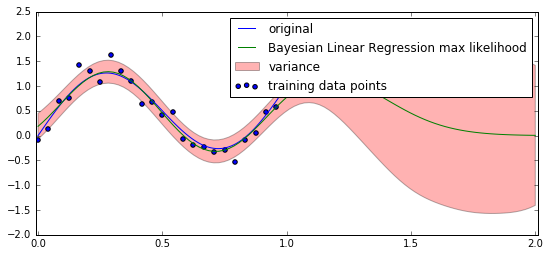

In [13]:
%matplotlib inline
pl.figure(figsize=(9,4))

N_pred = 100
x_pred = np.linspace(0,2,N_pred)

pred_means = np.zeros(N_pred)
pred_var = np.zeros(N_pred)
for c in range(0,N_pred):
    phi_vector_pred = np.zeros(9)
    for a in range(0,9):
        phi_vector_pred[a] = phi(x_pred[c],mu[a])
    phi_vector_pred = np.atleast_2d(phi_vector_pred).transpose()
    
    pred_means[c] = np.dot( m_N.transpose(), phi_vector_pred )
    pred_var[c] = (1/beta) + np.dot ( np.dot(phi_vector_pred.transpose(),S_N) , phi_vector_pred )
    
    
x_demo = np.linspace(0,1,100)
pl.plot(x_demo,np.sin(2*np.pi*x_demo)+x_demo,label='original')
pl.plot(x_pred,pred_means,label="Bayesian Linear Regression max likelihood")
#pl.plot(x_pred,pred_means+pred_var,'r-',label="variance")
#pl.plot(x_pred,pred_means-pred_var,'r-',)
pl.fill_between(x_pred,pred_means-pred_var,pred_means+pred_var,facecolor='red',alpha=0.3,label="variance")
pl.scatter(x,t,label="training data points")
pl.legend(loc='upper right')
pl.xlim(-0.01,2.01)

### Evidence Approximation

$ \lambda_{\textit{i}} $ is the eigenvalues of $ \Phi^{T} \Phi $ from equation (3.81)

$$ \gamma = \sum_{i}^{} \frac{\lambda_{\textit{i}}}{\alpha + \lambda_\textit{i}}   \qquad  (3.91) $$

$$ \textbf{m}_N = \beta \textbf{S}_N \Phi^{\textsf{T}} \textbf{t} \qquad (3.53) $$

$$ \alpha = \frac{\gamma}{\textbf{m}_N^T \textbf{m}_N}   \qquad (3.92)  $$

$$ \frac{1}{\beta} = \frac{1}{N-\gamma} \sum_{n=1}^{N}\{ t_n - \textbf{m}_N^T \phi(\textsf{x}_n) \}^2  \qquad (3.95)  $$

I will start with $\alpha = 1$ and $\beta = 1$ and iteratively evaluate these two parameters with (3.92) and (3.95)  until they converge.

In [14]:
alpha = 1
beta = 1

eigenvalues = np.linalg.eig( np.dot( design_matrix.transpose(), design_matrix) )[0]
print("eigenvalues: ", eigenvalues)

N_iter = 50 #Number of iterations

for a in range(0,N_iter):
    
    lambda_var = 0
    for b in range(0,9):
        lambda_var += eigenvalues[b] / (alpha + eigenvalues[b])
        
    m_N = beta * ( np.dot( np.dot(S_N,design_matrix.transpose()),
                          np.atleast_2d(t).transpose() ) )
        
    alpha = lambda_var / np.dot( m_N.transpose(), m_N)[0,0]
    
    sum_term = 0    #first we'll evaluate the sigma factor in equation (3.95)
    
    for b in range(0,N):
        phi_vector_pred = np.zeros(9)
        for a in range(0,9):
            phi_vector_pred[a] = phi(x[b],mu[a])
        phi_vector_pred = np.atleast_2d(phi_vector_pred).transpose()
        sum_term += ( t[a] - np.dot( m_N.transpose() , phi_vector_pred ) )**2
        
    beta = 1 / (  ( 1 / ( N - lambda_var ) ) * sum_term[0,0]  )
    
print("lambda = ", lambda_var)
print("alpha = ", alpha)
print("beta = ",beta)

eigenvalues:  [  1.95336891e+01   1.04639874e+01   3.80718140e+00   9.80485731e-01
   2.12282749e-01   1.18246368e-02   9.64839647e-06   2.20486236e-10
   1.64895065e-16]
lambda =  1.12513799092
alpha =  18.0385311558
beta =  0.605852605196


There must be something wrong with either the code or my understanding of the mathematics because these hyperparameter values does not work as well as the ones I have selected.

### Predictive distribution - multidimensional input space

Now let's expand to multi-dimensional inputs. 

In [22]:
T = 100

x = np.random.rand(2,T)*2 - 1
#for a in range(0,100):
#    x[0,a] = 0.2*((int) (a/10))
#    x[1,a] = 0.2*((int) (a%10))
t = np.random.rand(T)
for a in range(0,T):
    x_loc = x[0,a]
    y_loc = x[1,a]
    r1 = np.exp( -( (( np.sqrt((x_loc+0.6)**2 + (y_loc+0.4)**2) ))**2) / (2*(0.3**2)) )
    r2 = np.exp( -( (( np.sqrt((x_loc)**2 + (y_loc)**2) ))**2) / (2*(0.2**2)) )
    r3 = np.exp( -( (( np.sqrt((x_loc-0.3)**2 + (y_loc-0.6)**2) ))**2) / (2*(0.2**2)) )
    t[a] = r1 + r2 + r3


Here I attempt to write a function code that will do Bayesian linear regression for a data set any number of dimensions. I demonstrate it with the arbitrarily defined two-dimensional input space with the output shown below.

Both the training data and the test data has to be normalized so that, for each dimension, the mean is zero.

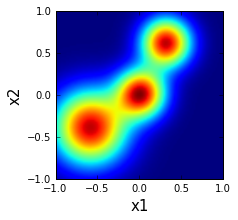

In [23]:
%matplotlib inline
pl.figure(figsize=(3,3))

#mathematics
t_actual_grid = np.zeros((100,100))
for a in range(0,100):
    for b in range(0,100):
        x_loc = -1 + (b*0.02)
        y_loc = -1 + (a*0.02)
        r1 = np.exp( -( (( np.sqrt((x_loc+0.6)**2 + (y_loc+0.4)**2) ))**2) / (2*(0.3**2)) )
        r2 = np.exp( -( (( np.sqrt((x_loc)**2 + (y_loc)**2) ))**2) / (2*(0.2**2)) )
        r3 = np.exp( -( (( np.sqrt((x_loc-0.3)**2 + (y_loc-0.6)**2) ))**2) / (2*(0.2**2)) )
        t_actual_grid[a][b] = r1 + r2 + r3
        
#figure
pl.imshow(t_actual_grid, extent=[-1,1,1,-1])
pl.ylabel('x2', fontsize=15)
pl.xlabel('x1', fontsize=15)
pl.gca().invert_yaxis()

I will use random training points (shown below) over the input space

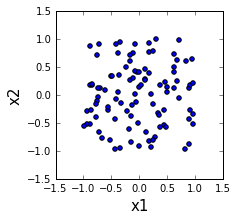

In [24]:
%matplotlib inline
pl.figure(figsize=(3,3))
pl.scatter(x[0,:],x[1,:])
pl.ylabel('x2', fontsize=15)
pl.xlabel('x1', fontsize=15)

Here I define means for the basis functions. If we would use, say, nine Gaussian basis functions for the one-dimensional case, then for an N-dimensional input space, there needs to 9^N basis functions. Their means must be evenly spaced throughout the normalized input space.

In [25]:
D = 2 #dimensionality
M = 9 #basis function ticks for each dimension (i.e. M^D basis functions)
means = np.zeros((M**D,D))
done = 0
mu_vector_amount = M**D
row_count = 0
column_count = 0
for a in range(0,mu_vector_amount*D):
    means[row_count,column_count] = ( (row_count//(M**column_count))%M*2/(M-1)) - 1
    row_count += 1
    if (row_count == mu_vector_amount):
        row_count = 0
        column_count += 1

Below are the means of a the basis functions for a 2-dimensional input space when we choose the M=9

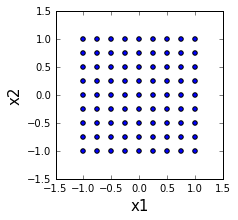

In [26]:
%matplotlib inline
pl.figure(figsize=(3,3))
#print(means)
pl.scatter(means[:,0],means[:,1])
pl.ylabel('x2', fontsize=15)
pl.xlabel('x1', fontsize=15)

Below is the function for evaluating a basis function given a point in N-dimensional input space and also a mean and a variance.

In [27]:
def basis(x,mu,s):
    D = np.shape(mu)[0]
    magnitude = 0
    for a in range(0,D):
        magnitude += (x[a] - mu[a])**2
    magnitude = np.sqrt(magnitude)
    phi = np.exp(-(magnitude**2)/(2*(s**2)))
    return phi

Now evaluate equations 3.16, 3.53, 3.54 just like for the one-dimensional case

In [28]:
alpha = 1
beta = 5
s = 0.2

design_matrix = np.zeros((T,M**D))
for a in range(0,M**D):
    for b in range(0,T):
        design_matrix[b,a] = basis(x[:,b],means[a,:],s)
S_N = inv( alpha*(np.identity(M*M)) + beta*np.dot(design_matrix.transpose(),design_matrix) )
m_N = beta * (   np.dot( np.dot(S_N,design_matrix.transpose()), np.atleast_2d(t).transpose() ) )

Now evaluate equation 3.58 for each of the test points.

In [29]:
#Test point grid
pred_means = np.zeros(10000)
x_test = np.zeros((10000,2))
row_count = 0
column_count = 0
for a in range(0,100):
    for b in range(0,100):
        x_loc = -1 + (b*0.02)
        y_loc = -1 + (a*0.02)
        x_test[a+100*b,0] = x_loc
        x_test[a+100*b,1] = y_loc

In [30]:
for b in range(1,10000):
    phi_vector_pred = np.zeros(M**D)
    for a in range(0,M**D):
        phi_vector_pred[a] = basis(x_test[b,:],means[a],s)
    phi_vector_pred = np.atleast_2d(phi_vector_pred).transpose()
    
    pred_means[b] = np.dot( m_N.transpose(), phi_vector_pred )

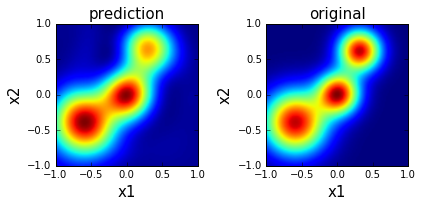

In [31]:
%matplotlib inline
pl.figure(figsize=(6,3))
pl.subplot(1, 2, 1)
pl.imshow(pred_means.reshape(100,100).transpose(), extent=[-1,1,1,-1])
pl.gca().invert_yaxis()
pl.title("prediction", fontsize=15)
pl.ylabel('x2', fontsize=15)
pl.xlabel('x1', fontsize=15)

pl.subplot(1, 2, 2)
pl.imshow(t_actual_grid, extent=[-1,1,1,-1])
pl.gca().invert_yaxis()
pl.title("original", fontsize=15)
pl.ylabel('x2', fontsize=15)
pl.xlabel('x1', fontsize=15)

pl.tight_layout()

And the prediction works well. Increasing the amount of training points will increase the accuracy of the prediction and vice versa. Originally I tried using 5^2 basis functions, but the prediction was not good, so I increased it to 9^2 basis functions to get the one above.



So, now that I have confirmed that my code works on this synthetic data set, let me try it on real world data sets. The data sets should not have many dimensions or the algorhithm's computation time will be too long. For example, just setting up basis function means (for M=9) for data with 9 or more dimensions returns a memory error and takes very long for 8.

I decided to try it with the wine quality data set. It lists the properties of various wine products and a rating out of 10 for each of these.

In [32]:
from numpy import loadtxt
lines = loadtxt("winequality-red.csv", comments="#", delimiter=";", unpack=False)
lines

array([[  7.4  ,   0.7  ,   0.   , ...,   0.56 ,   9.4  ,   5.   ],
       [  7.8  ,   0.88 ,   0.   , ...,   0.68 ,   9.8  ,   5.   ],
       [  7.8  ,   0.76 ,   0.04 , ...,   0.65 ,   9.8  ,   5.   ],
       ..., 
       [  6.3  ,   0.51 ,   0.13 , ...,   0.75 ,  11.   ,   6.   ],
       [  5.9  ,   0.645,   0.12 , ...,   0.71 ,  10.2  ,   5.   ],
       [  6.   ,   0.31 ,   0.47 , ...,   0.66 ,  11.   ,   6.   ]])

In [33]:
for a in range(0,11):
    lines[:,a] = (lines[:,a] - np.average(lines[:,a])) / (np.average(np.abs(lines[:,a])))

I will use only six of the attributes so that not too much computation is needed

In [34]:
train_x = lines[:1000,:5]
train_y = lines[:1000,11]
test_x = lines[1001:,:5]
test_y = lines[1001:,11]

Do further reduce computation time, I limit the number of basis functions I use (5^Dimension).

In [35]:
D = 5 #input dimensionality
M = 5 #basis function ticks for each dimension (i.e. M^D basis functions)
means = np.zeros((M**D,D))
done = 0
mu_vector_amount = M**D
row_count = 0
column_count = 0
for a in range(0,mu_vector_amount*D):
    means[row_count,column_count] = ( (row_count//(M**column_count))%M*2/(M-1)) - 1
    row_count += 1
    if (row_count == mu_vector_amount):
        row_count = 0
        column_count += 1

In [36]:
alpha = 1
beta = 5
s = 0.2

design_matrix = np.zeros((1000,M**D))
for a in range(0,M**D):
    for b in range(0,1000):
        design_matrix[b,a] = basis(train_x[b,:],means[a,:],s)
S_N = inv( alpha*(np.identity(M**D)) + beta*np.dot(design_matrix.transpose(),design_matrix) )
m_N = beta * (   np.dot( np.dot(S_N,design_matrix.transpose()), np.atleast_2d(train_y).transpose() ) )

In [37]:
pred_means = np.zeros(np.shape(test_x)[0])
for b in range(0,np.shape(test_x)[0]):
    
    phi_vector_pred = np.zeros(M**D)
    for a in range(0,M**D):
        phi_vector_pred[a] = basis(test_x[b,:],means[a],s)
    phi_vector_pred = np.atleast_2d(phi_vector_pred).transpose()

    pred_means[b] = np.dot( m_N.transpose(), phi_vector_pred )

Despite the limitations I made, that prediction took about a minute to be computed. Also, the limitations had a price, because as shown below, the mean predictions deviate from the actual value by 11%.

To-Do: Calculate the probability of the actual ratings.

In [38]:
print("average of the predicted ratings:",np.average(pred_means))
print("average of the actual ratings:",np.average(test_y))

average of the predicted ratings: 4.61388633011
average of the actual ratings: 5.70401337793


Some more possibly suitable data sets:

 - sample weather station data (day,T max, T min, precipitation)
https://www.ncdc.noaa.gov/cdo-web/datasets

 - country data
http://hdr.undp.org/en/data

 - HDI and components
http://hdr.undp.org/en/composite/HDI

 - https://archive.ics.uci.edu/ml/datasets.html

 - It says its for classification, but it seems to be good:
https://archive.ics.uci.edu/ml/datasets/Abalone

 - https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

 - https://archive.ics.uci.edu/ml/datasets/Computer+Hardware

Let's try it with another data set: a weather data sample

The input space is the date, the minimum temperature, and the maximum temperature of a weather station. The output is the precipitation

In [39]:
from numpy import loadtxt
lines = loadtxt("weather_station_sample.csv", comments="#", delimiter=",", usecols = (5,6,7,8), unpack=False)

In [40]:
for b in range(0,365):
    lines[b,0] = b
for a in range(0,3):
    lines[:,a] = (lines[:,a] - np.average(lines[:,a]))  / (np.average(np.abs(lines[:,a])))

The data of every second day is used as the training data. All the samples will be the test data.

In [41]:
n = 5 #training data is every nth day
N_train = (int)((365/n)//1)
foo = np.linspace(1,365,N_train)//1
foo = np.ones(N_train,dtype=np.int16)
for a in range(0,N_train):
    foo[a] = foo[a]*a*2
train_y = lines[foo,3]
train_x = lines[foo,:3]
test_x = lines[:,:3]
test_y = lines[:,3]

Let's first test it by setting M = 5. That means there will be D^M = 3^5 = 243 basis functions.

In [42]:
D = 3 #input dimensionality
M = 10 #basis function ticks for each dimension (i.e. M^D basis functions)
means = np.zeros((M**D,D))
done = 0
mu_vector_amount = M**D
row_count = 0
column_count = 0
for a in range(0,mu_vector_amount*D):
    means[row_count,column_count] = ( (row_count//(M**column_count))%M*2/(M-1)) - 1
    row_count += 1
    if (row_count == mu_vector_amount):
        row_count = 0
        column_count += 1

In [43]:
alpha = 1
beta = 5
s = 0.2

design_matrix = np.zeros((N_train,M**D))
for a in range(0,M**D):
    for b in range(0,N_train):
        design_matrix[b,a] = basis(train_x[b,:],means[a,:],s)
S_N = inv( alpha*(np.identity(M**D)) + beta*np.dot(design_matrix.transpose(),design_matrix) )
m_N = beta * (   np.dot( np.dot(S_N,design_matrix.transpose()), np.atleast_2d(train_y).transpose() ) )

In [44]:
pred_means = np.zeros(np.shape(test_x)[0])
for b in range(0,np.shape(test_x)[0]):
    
    phi_vector_pred = np.zeros(M**D)
    for a in range(0,M**D):
        phi_vector_pred[a] = basis(test_x[b,:],means[a],s)
    phi_vector_pred = np.atleast_2d(phi_vector_pred).transpose()

    pred_means[b] = np.dot( m_N.transpose(), phi_vector_pred )

The calculations was completed in a moment

Results:

In [45]:
print("average of the predicted precipitation:",np.average(pred_means))
print("average of the actual precipitation:",np.average(test_y))

average of the predicted precipitation: 40.6289311525
average of the actual precipitation: 87.5917808219


Here are the predicted results for various values of M:

M=3: 33.0

M=4: 74.4

M=5: 85.9

M=6: 86.572

M=6: 87.4

M=7: 87.6

M=9: 87.9  (Here the calculations took a few seconds)


Now let's keep the value of M at 9 and test the results of letting the training data be every nth day:

n=3: 82.605

n=4: 107.40

n=5: 40.62

Another data set:

In this one the entries is various concretes.

The input attributes are the how much it contains of each of the following: Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.

There are three output attributes: Slump, Flow, and 28-day compressive strength. Let's use the third of these.

In [ ]:
from numpy import loadtxt
lines = loadtxt("slump_test.data", comments="#", delimiter=",", usecols = (1,2,3,4,5,6,7,8,9,10), unpack=False)

for a in range(0,10):
    lines[:,a] = (lines[:,a] - np.average(lines[:,a]))  / (np.average(np.abs(lines[:,a])))
lines

In [ ]:
train_x = lines[:70,:7]
train_y = lines[:70:,9]
test_x = lines[70:,:7]
test_y = lines[70:,9]
N_train = 70

In [ ]:
D = 7 #input dimensionality
M = 3 #basis function ticks for each dimension (i.e. M^D basis functions)
means = np.zeros((M**D,D))
done = 0
mu_vector_amount = M**D
row_count = 0
column_count = 0
for a in range(0,mu_vector_amount*D):
    means[row_count,column_count] = ( (row_count//(M**column_count))%M*2/(M-1)) - 1
    row_count += 1
    if (row_count == mu_vector_amount):
        row_count = 0
        column_count += 1

In [ ]:
alpha = 1
beta = 5
s = 0.2

design_matrix = np.zeros((N_train,M**D))
for a in range(0,M**D):
    for b in range(0,N_train):
        design_matrix[b,a] = basis(train_x[b,:],means[a,:],s)
S_N = inv( alpha*(np.identity(M**D)) + beta*np.dot(design_matrix.transpose(),design_matrix) )
m_N = beta * (   np.dot( np.dot(S_N,design_matrix.transpose()), np.atleast_2d(train_y).transpose() ) )

In [ ]:
pred_means = np.zeros(np.shape(test_x)[0])
for b in range(0,np.shape(test_x)[0]):
    
    phi_vector_pred = np.zeros(M**D)
    for a in range(0,M**D):
        phi_vector_pred[a] = basis(test_x[b,:],means[a],s)
    phi_vector_pred = np.atleast_2d(phi_vector_pred).transpose()

    pred_means[b] = np.dot( m_N.transpose(), phi_vector_pred )

In [ ]:
print("average of the predicted output:",np.average(pred_means))
print("average of the actual output:",np.average(test_y))